In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('E:/Data Science/Datasets/Algerian_forest_fires_dataset.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'E:/Data Science/Datasets/Algerian_forest_fires_dataset.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


## Data Cleaning

In [ ]:
## missing values
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
df.loc[:121, "region"] = 0
df.loc[122:, "region"] = 1

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.loc[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0
123,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
124,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
125,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
126,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
127,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
128,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1.0
129,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire,1.0


In [ ]:
df.drop(122, inplace=True)
df.reset_index(drop=True, inplace=True)
df.loc[122:123]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4    RH          243 non-null    object 
 5    Ws          243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [ ]:
df['region'] = df['region'].astype('int8')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int8  
dtypes: int8(1), object(14)
memory usage: 26.9+ KB


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
## Removing null values
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int8  
dtypes: int8(1), object(14)
memory usage: 26.9+ KB


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [ ]:
## fix spaces in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [ ]:
df['month'].unique()

array(['6', '7', '8', '9'], dtype=object)

In [ ]:
## change the required columns to numeric
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype('int16')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int16 
 1   month        243 non-null    int16 
 2   year         243 non-null    int16 
 3   Temperature  243 non-null    int16 
 4   RH           243 non-null    int16 
 5   Ws           243 non-null    int16 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int8  
dtypes: int16(6), int8(1), object(8)
memory usage: 18.4+ KB


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
obj = [feature for feature in df.columns if df[feature].dtype == 'O']
obj

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [ ]:
for feature in obj:
    if feature != 'Classes':
        df[feature] = df[feature].astype('float16')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int16  
 1   month        243 non-null    int16  
 2   year         243 non-null    int16  
 3   Temperature  243 non-null    int16  
 4   RH           243 non-null    int16  
 5   Ws           243 non-null    int16  
 6   Rain         243 non-null    float16
 7   FFMC         243 non-null    float16
 8   DMC          243 non-null    float16
 9   DC           243 non-null    float16
 10  ISI          243 non-null    float16
 11  BUI          243 non-null    float16
 12  FWI          243 non-null    float16
 13  Classes      243 non-null    object 
 14  region       243 non-null    int8   
dtypes: float16(7), int16(6), int8(1), object(1)
memory usage: 8.4+ KB


In [ ]:
df_copy = df.copy()
df_copy.head()

c:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.000000,65.68750,3.400391,7.601562,1.299805,3.400391,0.500000,not fire,0
1,2,6,2012,29,61,13,1.299805,64.37500,4.101562,7.601562,1.000000,3.900391,0.399902,not fire,0
2,3,6,2012,26,82,22,13.101562,47.09375,2.500000,7.101562,0.300049,2.699219,0.099976,not fire,0
3,4,6,2012,25,89,13,2.500000,28.59375,1.299805,6.898438,0.000000,1.700195,0.000000,not fire,0
4,5,6,2012,27,77,16,0.000000,64.81250,3.000000,14.203125,1.200195,3.900391,0.500000,not fire,0


In [ ]:
df_copy.to_csv('Algerian_forest_fires_clean_dataset.csv', index=False)

## Exploratory Data Analysis

In [ ]:
## drop day, month and year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [ ]:
df.head()

c:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.000000,65.68750,3.400391,7.601562,1.299805,3.400391,0.500000,not fire,0
1,29,61,13,1.299805,64.37500,4.101562,7.601562,1.000000,3.900391,0.399902,not fire,0
2,26,82,22,13.101562,47.09375,2.500000,7.101562,0.300049,2.699219,0.099976,not fire,0
3,25,89,13,2.500000,28.59375,1.299805,6.898438,0.000000,1.700195,0.000000,not fire,0
4,27,77,16,0.000000,64.81250,3.000000,14.203125,1.200195,3.900391,0.500000,not fire,0


In [ ]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [ ]:
## incode categories in classes
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)
df.head()

c:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.000000,65.68750,3.400391,7.601562,1.299805,3.400391,0.500000,0,0
1,29,61,13,1.299805,64.37500,4.101562,7.601562,1.000000,3.900391,0.399902,0,0
2,26,82,22,13.101562,47.09375,2.500000,7.101562,0.300049,2.699219,0.099976,0,0
3,25,89,13,2.500000,28.59375,1.299805,6.898438,0.000000,1.700195,0.000000,0,0
4,27,77,16,0.000000,64.81250,3.000000,14.203125,1.200195,3.900391,0.500000,0,0


In [ ]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [ ]:
df.tail()

c:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,30,65,14,0.000000,85.37500,16.000000,44.500000,4.500000,16.906250,6.500000,1,1
239,28,87,15,4.398438,41.09375,6.500000,8.000000,0.099976,6.199219,0.000000,0,1
240,27,87,29,0.500000,45.90625,3.500000,7.898438,0.399902,3.400391,0.199951,0,1
241,24,54,18,0.099976,79.68750,4.300781,15.203125,1.700195,5.101562,0.700195,0,1
242,24,64,15,0.199951,67.31250,3.800781,16.500000,1.200195,4.800781,0.500000,0,1


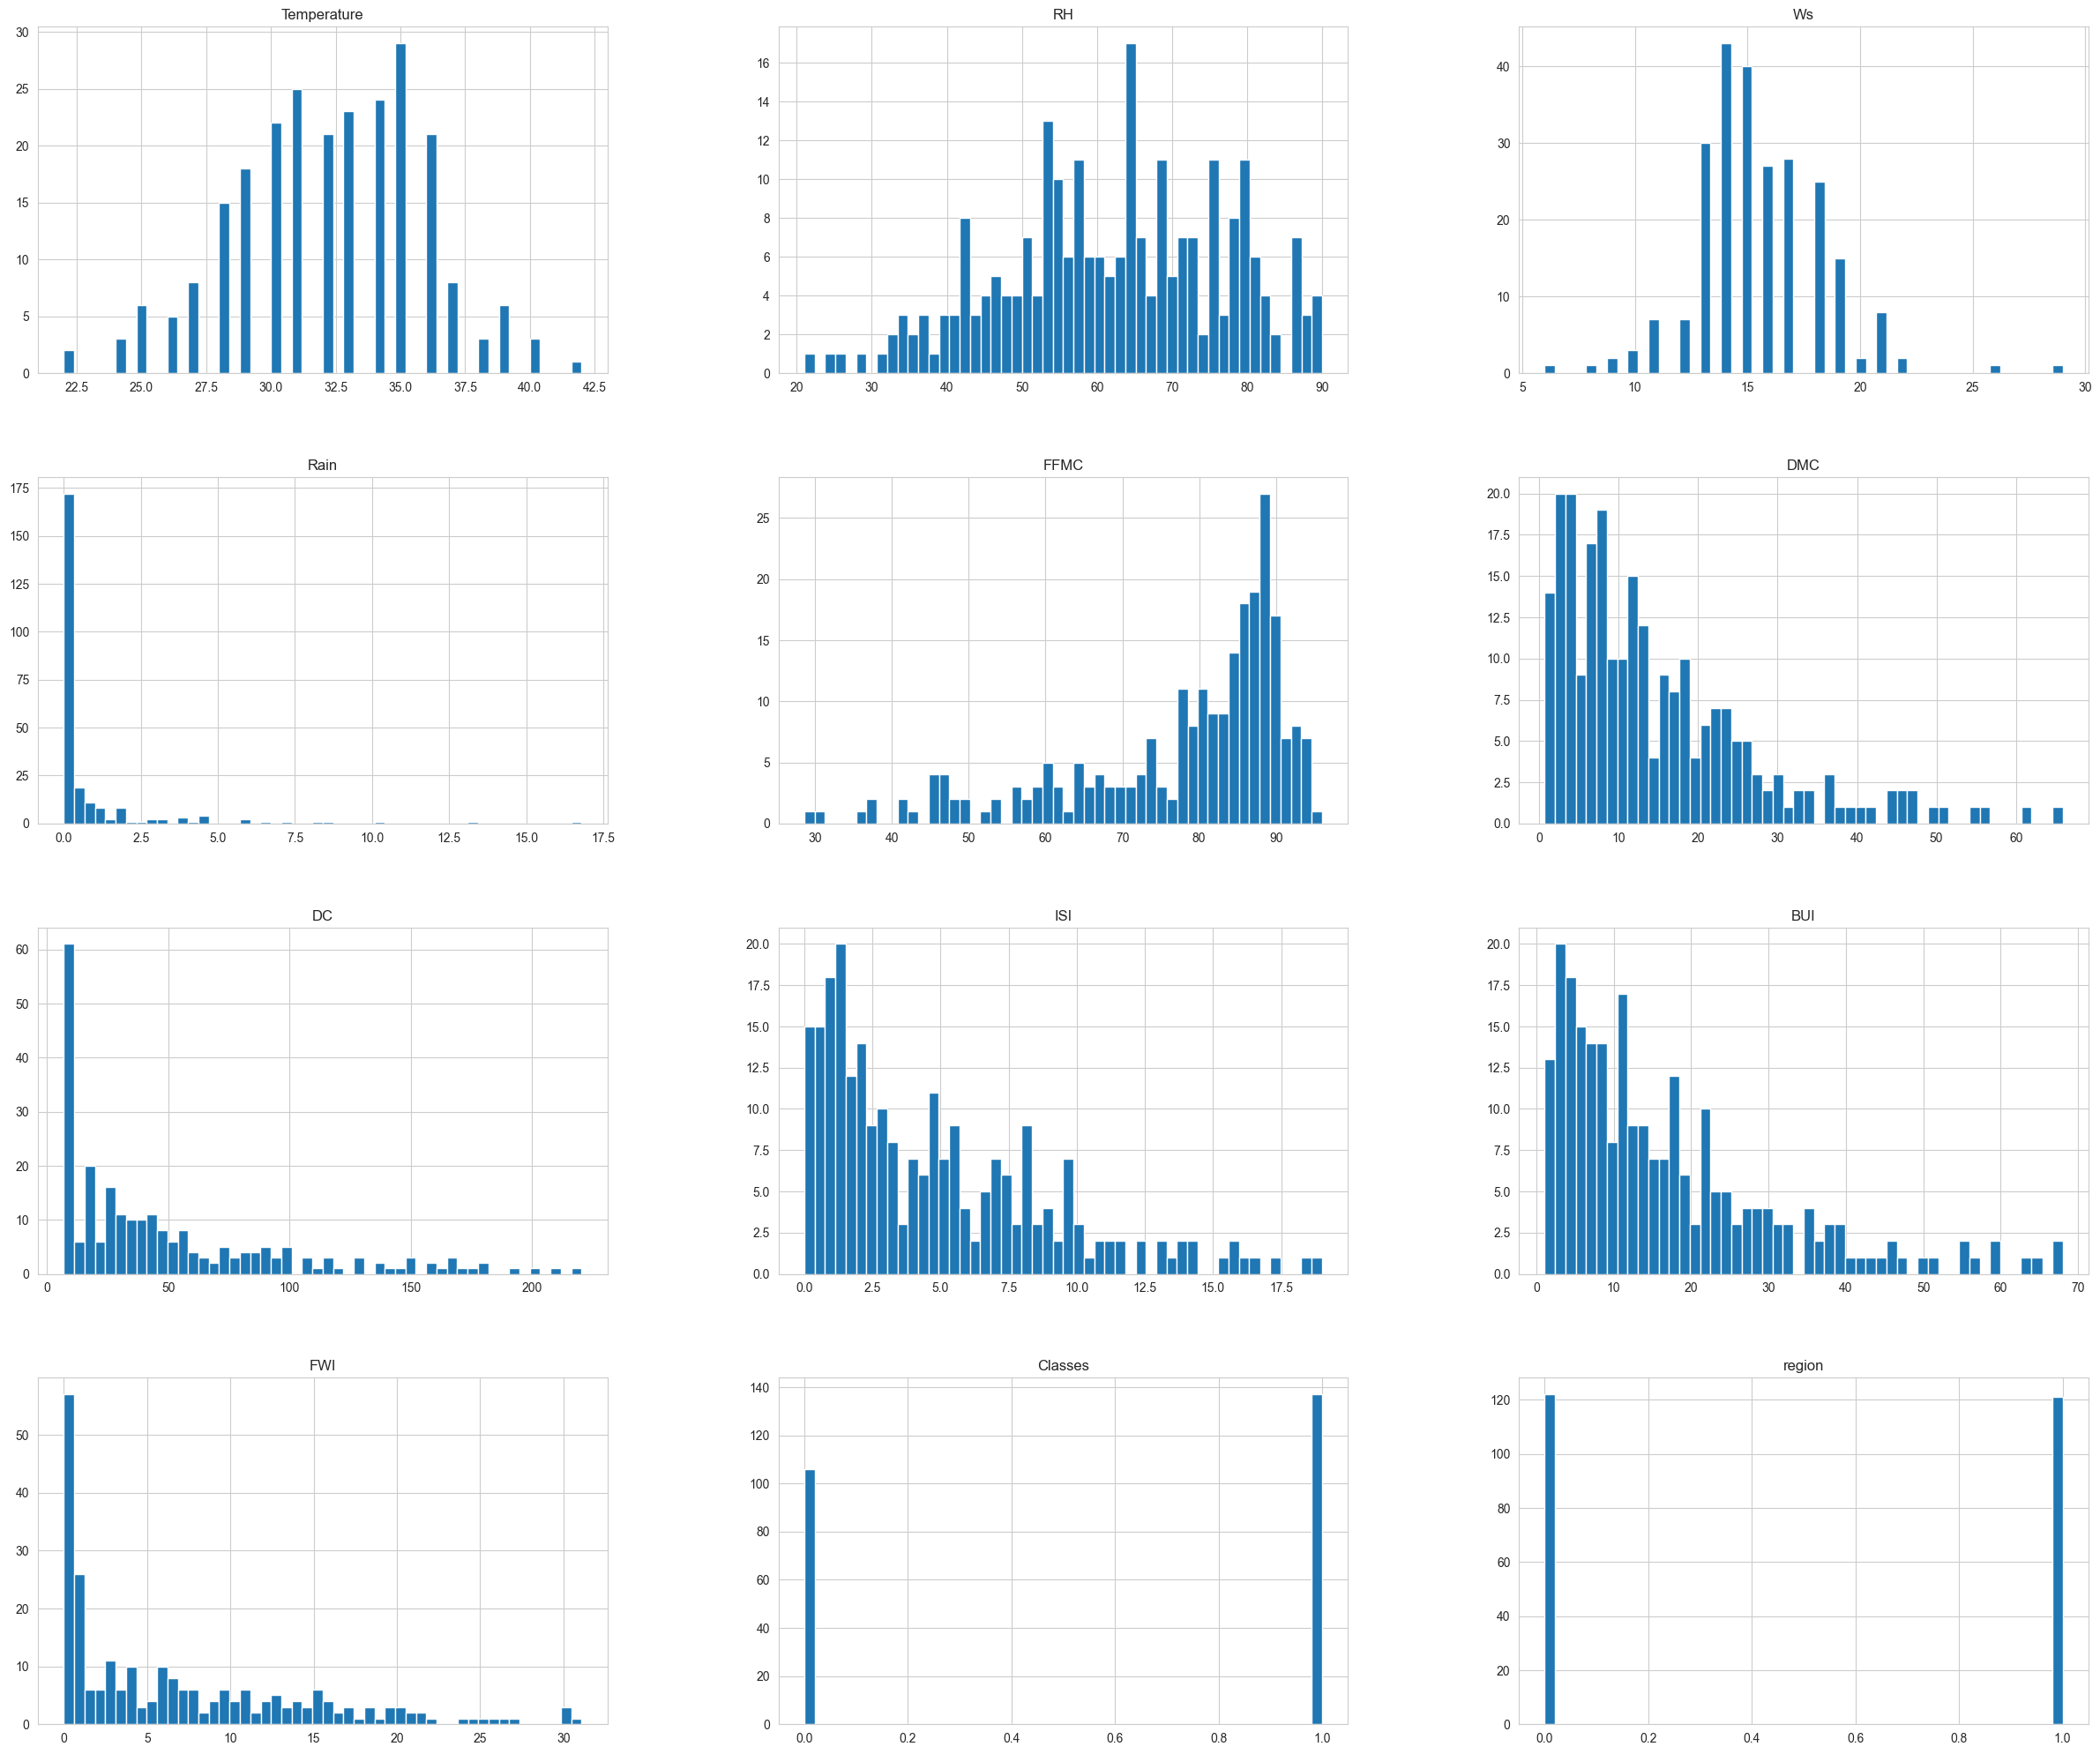

In [ ]:
## Plot density plot for all features

df.hist(bins=50, figsize=(30,25))
plt.show()

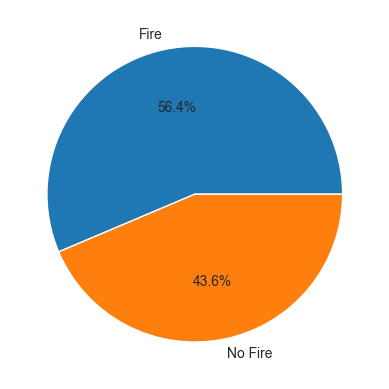

In [ ]:
## plotting pie chart for classes
plt.pie(df['Classes'].value_counts(), labels=['Fire', 'No Fire'], autopct='%0.1f%%')
plt.show()

In [ ]:
## Correlation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326483,0.676572,0.485695,0.376276,0.603862,0.459806,0.566657,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222353,-0.644827,-0.408530,-0.226954,-0.686662,-0.353856,-0.580931,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171465,-0.166446,-0.000731,0.079156,0.008519,0.031420,0.032380,-0.069964,-0.181160
Rain,-0.326483,0.222353,0.171465,1.000000,-0.543920,-0.288783,-0.298032,-0.347491,-0.299892,-0.324430,-0.379103,-0.040009
FFMC,0.676572,-0.644827,-0.166446,-0.543920,1.000000,0.603568,0.507296,0.740021,0.591973,0.691114,0.769425,0.222267
DMC,0.485695,-0.408530,-0.000731,-0.288783,0.603568,1.000000,0.875947,0.680454,0.982255,0.875871,0.585658,0.192080
DC,0.376276,-0.226954,0.079156,-0.298032,0.507296,0.875947,1.000000,0.508678,0.941987,0.739563,0.511143,-0.078703
ISI,0.603862,-0.686662,0.008519,-0.347491,0.740021,0.680454,0.508678,1.000000,0.644141,0.922897,0.735198,0.263173
BUI,0.459806,-0.353856,0.031420,-0.299892,0.591973,0.982255,0.941987,0.644141,1.000000,0.858008,0.586663,0.089430
FWI,0.566657,-0.580931,0.032380,-0.324430,0.691114,0.875871,0.739563,0.922897,0.858008,1.000000,0.719216,0.197081


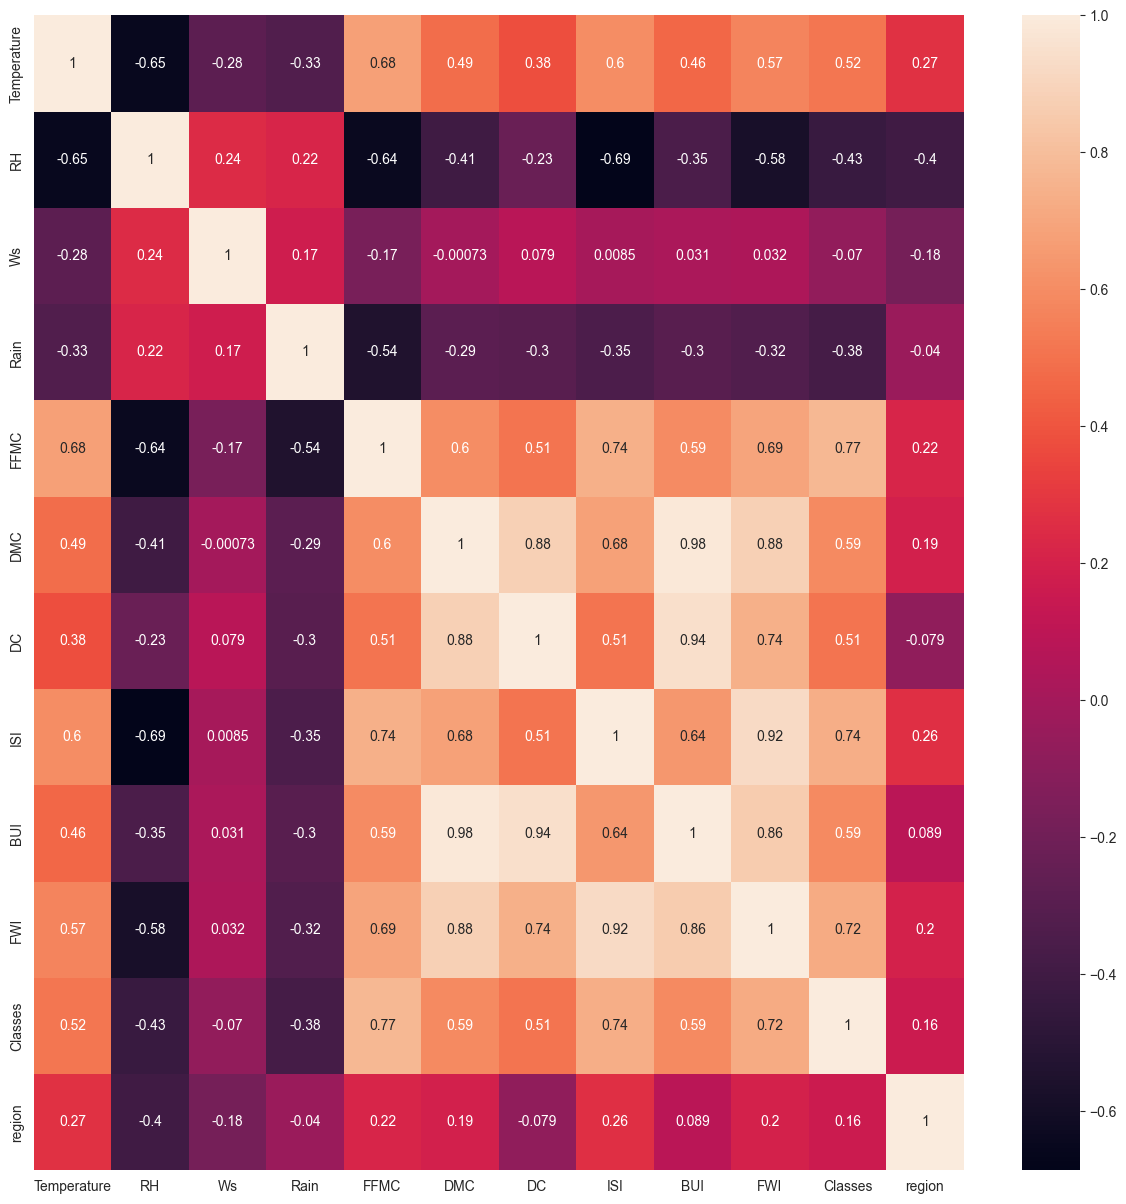

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

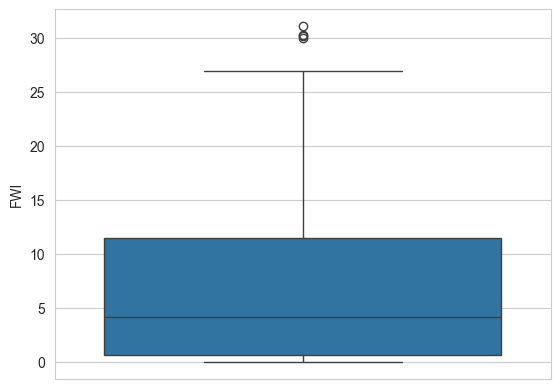

In [ ]:
## Box plots for outliers
sns.boxplot(data=df['FWI'])
plt.show()

In [ ]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 'not fire', 'fire')
df_copy.tail()

c:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,26,9,2012,30,65,14,0.000000,85.37500,16.000000,44.500000,4.500000,16.906250,6.500000,fire,1
239,27,9,2012,28,87,15,4.398438,41.09375,6.500000,8.000000,0.099976,6.199219,0.000000,not fire,1
240,28,9,2012,27,87,29,0.500000,45.90625,3.500000,7.898438,0.399902,3.400391,0.199951,not fire,1
241,29,9,2012,24,54,18,0.099976,79.68750,4.300781,15.203125,1.700195,5.101562,0.700195,not fire,1
242,30,9,2012,24,64,15,0.199951,67.31250,3.800781,16.500000,1.200195,4.800781,0.500000,not fire,1


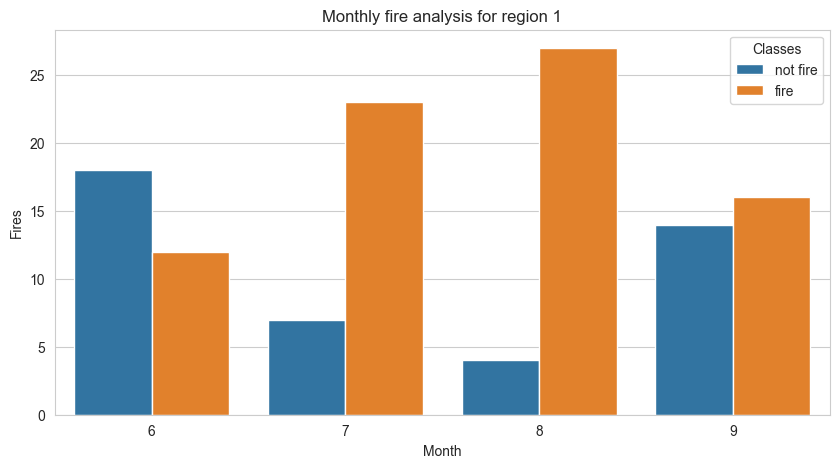

In [ ]:
## Monthly fire analysis
dftemp = df_copy.loc[df_copy['region']==1]
plt.subplots(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(x=dftemp['month'], hue=dftemp['Classes'])
plt.xlabel('Month')
plt.ylabel('Fires')
plt.title('Monthly fire analysis for region 1')
plt.show()

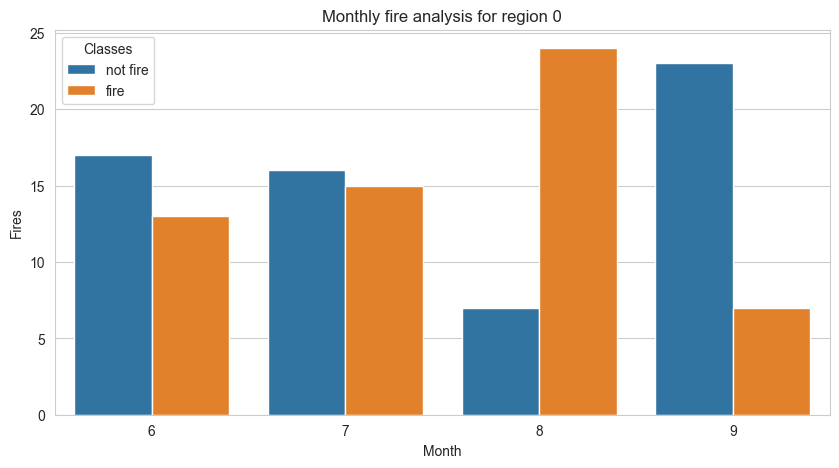

In [ ]:
dftemp = df_copy.loc[df_copy['region']==0]
plt.subplots(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(x=dftemp['month'], hue=dftemp['Classes'])
plt.xlabel('Month')
plt.ylabel('Fires')
plt.title('Monthly fire analysis for region 0')
plt.show()